# 정규화 선형회귀 Regularized Linear Model (RLM)

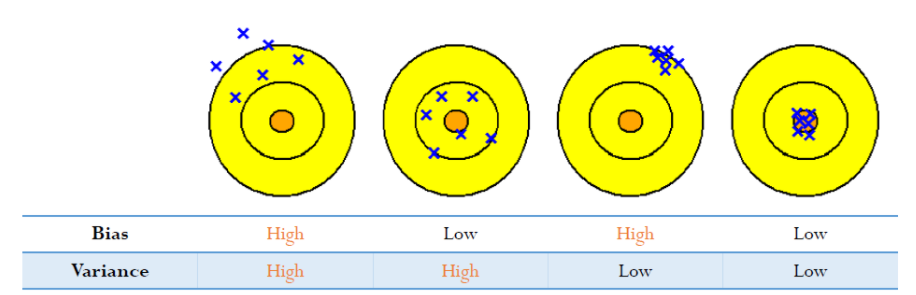

양궁 과녁을 통해 편향(Bias) 분산(Variance) 고/저의 의미를 직관적으로 이해할 수 있습니다.<br><br>
1. 첫 번째 그림은 편향과 분산이 매우 높아 정확한 예측 결과를 벗어나면서, 넓은 부분에 분포 되어 있습니다.<br><br>
2. 두 번째 그림은 편향은 낮고 분산이 매우 높은 경우로 예측 결과과 실제 결과와 유사하지만, 넓은 부분에 분포되어 있습니다.<br><br>
3. 세 번째 그림은 편향은 높고 분산이 낮은 경우로 예측 결과가 실제 결과와 불일치 하지만, 특정부분에 집중 되어 있습니다.<br><br>
4. 마지막 그림은 편향과 분산이 모두 낮은 경우로 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 매우 뛰어난 성능을 보입니다.

 일반적으로 편향과 분산은 한 쪽이 높으면, 한 쪽이 낮아지는 경향이 있습니다. <strong>즉 편향이 높은면 분산은 낮아지고(과소적합)</strong> 반대로 <strong>분산이 높으면 편향이 낮아집니다.(과접합)</strong> 

## 정규화의 목적

지금 까지의 회귀분석은 실제 값과 예측값의 차이를 최소화 하는 것만을 고려했습니다. 이로 인해 학습 데이터에 지나치게 맞추게 되고, 회귀계수가 쉽게 커졌습니다. 이럴 경우 변동성이 심해져, 예측 성능이 저하됩니다. 이를 반영해 비용 함수는 과적합을 막기 위한 방법으로 균형을 맞추는 방법입니다.

즉 **정규화(regularization)**란 회귀계수가 가질 수 있는 값에 제약조건을 부여하는 방법 

- 정규화는 variance를 감소시켜 일반화 성능↑
- 학습 데이터에 대한 설명력 < 미래 데이터 변화에 적용

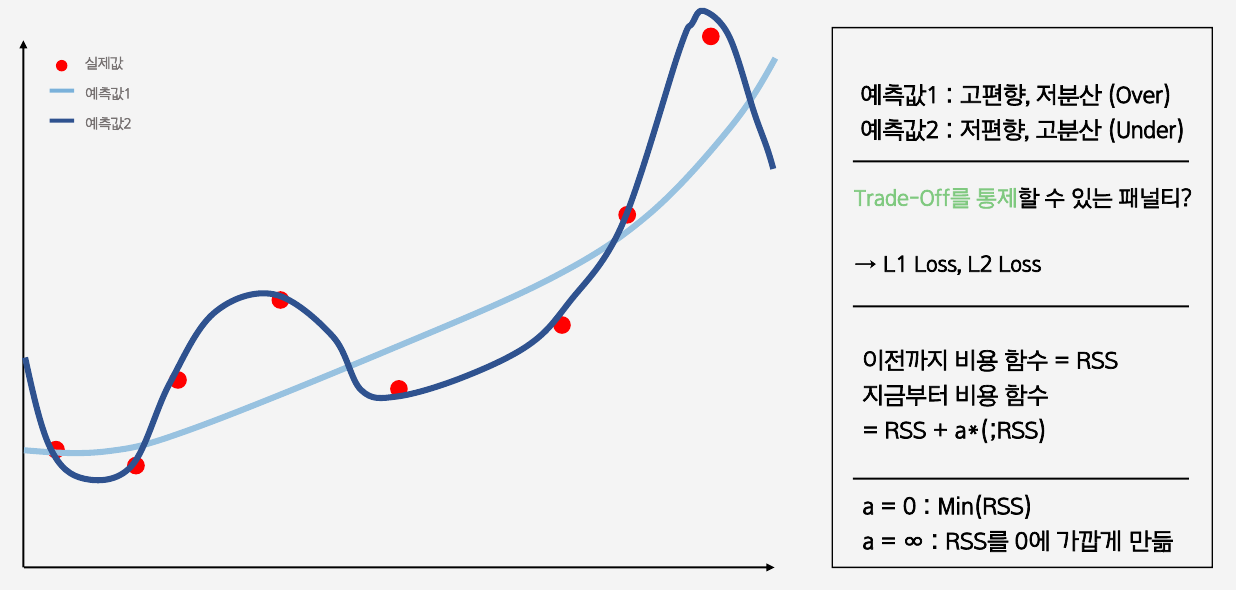

**Ridge/Lasso/Elastic net 모두 regularization을 이용한 회귀 모델링 기법**
- Overfitted Model을 정규화(Regularization)함으로써 현재 갖고있는 데이터 뿐만 아니라, 새로운 데이터에도 회귀식을 적용할 수 있도록 일반화시키는 회귀방식

**Under/Over/Good-Fit Model**

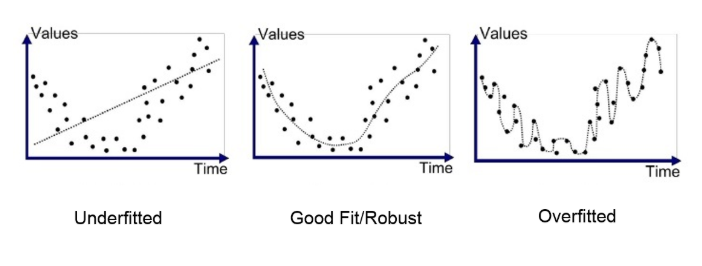

## What is Ridge/Lasso Regression?

**제약 조건?**
- Train data에 최적화된 over-fitted model이 아닌, Test data를 가장 잘 설명 할 수 있도록 parameter(모수: 특히, __$\beta$[기울기]__)에 제약을 주는 것. 
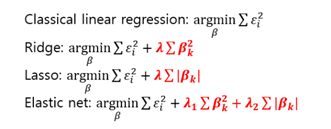

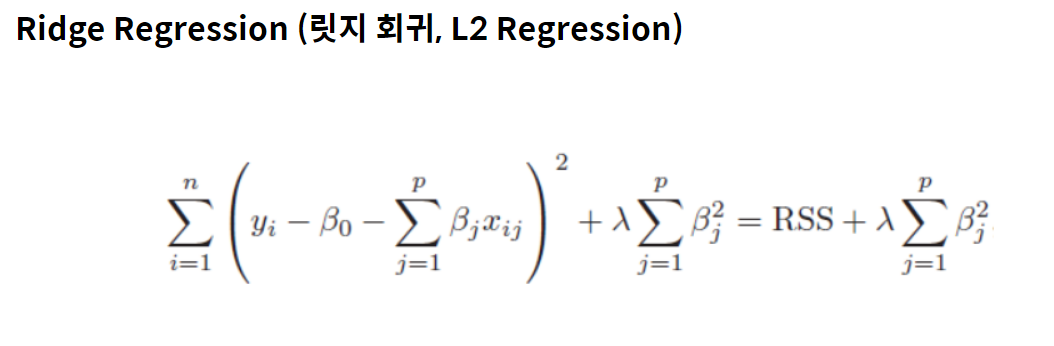

- __L2 페널티__

- hyperparameter인 λ: 지정 필요
- λ= 0 일 경우: overfitting 될 수도 있음
- λ가 과도하게 클 경우: underfitting 될 수도 있음

- 회귀계수를 0에 가깝게 만들지만 정확히 0으로 만들지는 않음!

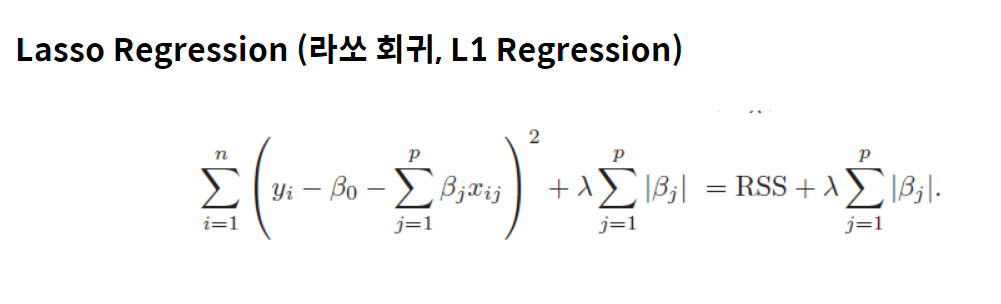

- __L1 페널티__
- 회귀계수를 정확히 0으로 만들 수 있음 → 중요한 변수와 중요하지 않은 변수 __피처 선택 특성__

<p style="font-size: 22px; font-weight:bold; line-height:lem">Elastic Net (엘라스틱 넷 회귀)</p>

<p style="font-size: 17px;line-height:lem">Loss Function= OLS loss function  + $\lambda \sum \beta_j^2$ + $\lambda \sum | \beta_j |$</p>
- L1, L2 페널티

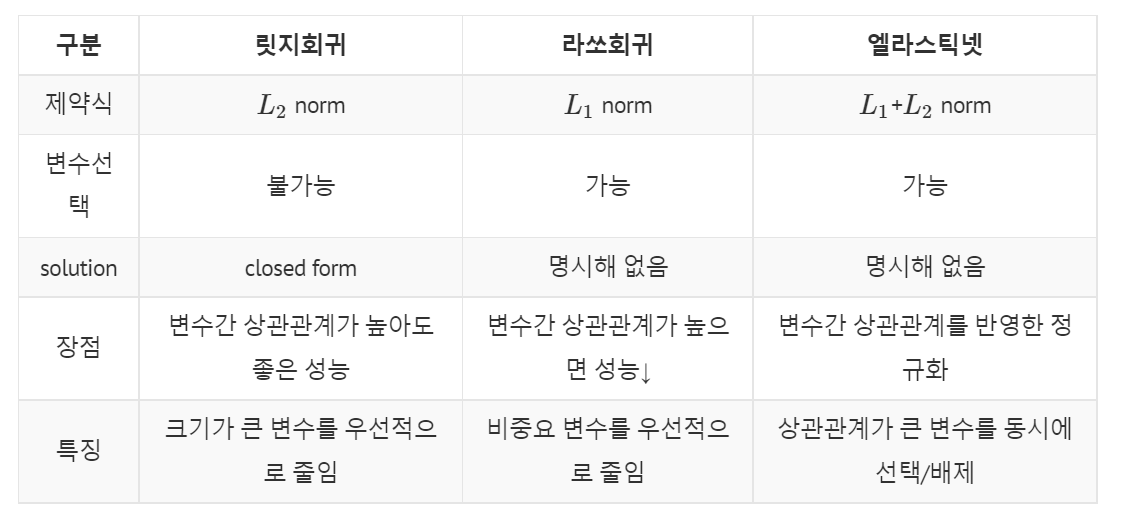

## Ridge Regression 구현

_릿지 회귀는 alpha 값이 커질수록 회귀 계수 값을 작게 만든다는 특징_<br>
릿지 회귀는 alpha값을 크게 지정할수록 회귀 계수 값이 작아진다는 특징이 있습니다.<br>
여기서 한가지 중요한 점은 릿지 회귀의 경우 회귀 계수를 작게 만든다는 특징이 있지만 0으로 만들지는 않기 때문에 피처 선택의 효과는 기대할 수 없다는 점입니다!

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
#alpha=10으로 설정한 릿지 회귀
ridge = Ridge(alpha=10) # alpha = Lambda
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_mse = np.mean(rmse_scores)

print('5 folds의 개별 MSE scores: ', np.round(-neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_mse))

5 folds의 개별 MSE scores:  [11.422 24.294 28.144 74.599 28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


- 릿지 회귀는 alpha 값이 커질수록 회귀 계수 값을 작게 만듭니다. alpha=페널티 값을 의미!

- "neg_mean_squared_error": “오차가 올라가면 나쁘다.”를 “점수가 올라가면 좋다.”로 바꾸어서 생각해 볼게요. sklearn은 MSE에 음수를 취해서 오차를 점수로 바꿉니다. 점수는 모두 음수가 되겠지만, 점수가 클수록 좋은 것이지요. 돈을 적게 잃어야 하는 것과 같습니다. 100을 잃는 대신 7.5만 잃는다고 생각하는 것이죠.



In [23]:
#sklearn에서 활용할 수 있는 scores 의 목록
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

- cv의 의미 
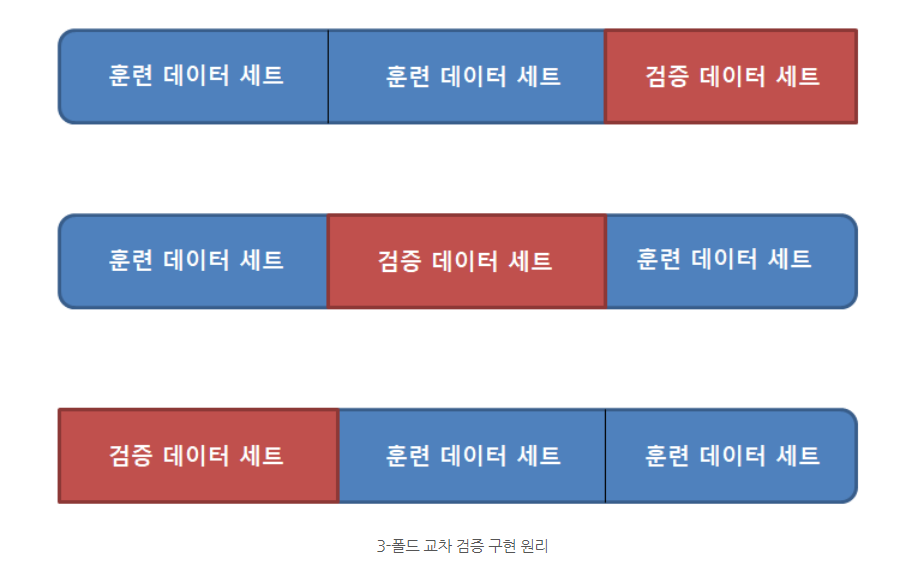

참고: https://heytech.tistory.com/113

In [19]:
#Ridge에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

#alphas list값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    #cross_val_score를 이용해 5folds의 평균 RMSE계산
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5folds의 평균 RMSE: {1:.3f} '.format(alpha, avg_rmse))

alpha 0일 때 5folds의 평균 RMSE: 5.829 
alpha 0.1일 때 5folds의 평균 RMSE: 5.788 
alpha 1일 때 5folds의 평균 RMSE: 5.653 
alpha 10일 때 5folds의 평균 RMSE: 5.518 
alpha 100일 때 5folds의 평균 RMSE: 5.330 


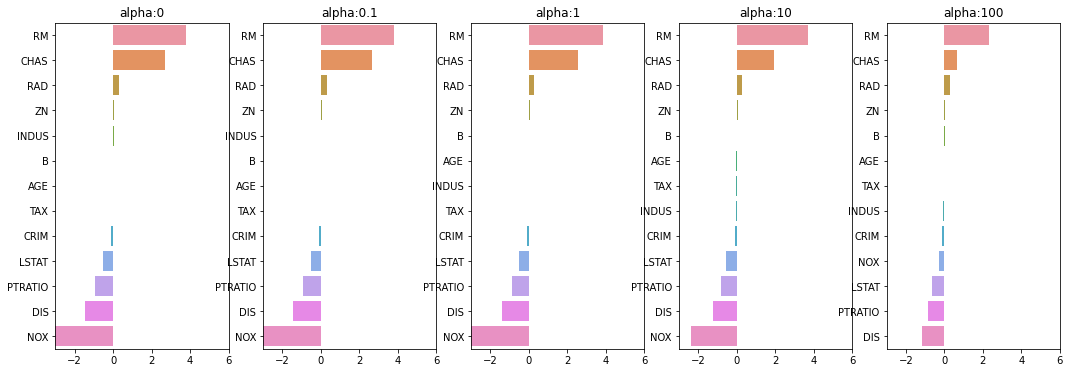

           alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
CRIM     -0.108011  -0.107474  -0.104595 -0.101435  -0.102202
ZN        0.046420   0.046572   0.047443  0.049579   0.054496
INDUS     0.020559   0.015999  -0.008805 -0.042962  -0.052826
CHAS      2.686734   2.670019   2.552393  1.952021   0.638335
NOX     -17.766611 -16.684645 -10.777015 -2.371619  -0.262847
RM        3.809865   3.818233   3.854000  3.702272   2.334536
AGE       0.000692  -0.000269  -0.005415 -0.010707   0.001212
DIS      -1.475567  -1.459626  -1.372654 -1.248808  -1.153390
RAD       0.306049   0.303515   0.290142  0.279596   0.315358
TAX      -0.012335  -0.012421  -0.012912 -0.013993  -0.015856
PTRATIO  -0.952747  -0.940759  -0.876074 -0.797945  -0.829218
B         0.009312   0.009368   0.009673  0.010037   0.009393
LSTAT    -0.524758  -0.525966  -0.533343 -0.559366  -0.660764


In [6]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
alphas = [0, 0.1, 1, 10, 100]
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame생성
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)

    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    # 각 ridge 함수의 독립변수의 coef 값을 데이터로 활용하며, 인덱스는 독립변수의 이름.
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    #막대 그래프로 각 alpha값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()
print(coeff_df)

alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있습니다. 하지만 릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않습니다.

__[최적 파라미터로 예측]__


- GridSearchCV: 사용자가 직접 모델의 하이퍼 파라미터의 값을 리스트로 입력하면 값에 대한 경우의 수마다 예측 성능을 측정 평가하여 비교하면서 최적의 하이퍼 파라미터 값을 찾는 과정을 진행합니다.
<br><br>
- 참고: https://velog.io/@hyunicecream/GridSearchCV%EB%9E%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EC%82%AC%EC%9A%A9%ED%95%A0%EA%B9%8C

In [7]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_value = {'alpha':[0.0001,0.01,0,1,10,100]}
modelRidge = Ridge()
gridSearch = GridSearchCV(modelRidge,param_grid = param_value,cv=10) # 교차검증, 파라미터 값 찾기
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.01, 0, 1, 10, 100]})

In [10]:
# 참고해서 alpha값을 다양하게 바꿔보기
gridSearch.best_params_ 

{'alpha': 0.01}

In [11]:
#최적의 파라미터로 Ridge를 했을 때의 score
gridSearch.best_score_ 

0.6896919708626565

In [12]:
#X_test 값을 통해 예측 Y값 이중 0.69정도로 y_test와 일치한다는 것을의미
gridSearch.best_estimator_.predict(X_test) 

array([23.13911488, 19.66852966, 36.4274538 , 19.96950314, 32.39430416,
       17.66527711, 30.32138576, 17.83280912, 10.86327675, 12.83671547,
       21.17421792, 16.42430141, 28.66185304, 37.00924354, 23.42210569,
       24.57141459, 14.56750639, 11.51203684, 30.28347968, 23.47376394,
       22.85558105, 17.60681023, 21.25995427, 17.29941519, 34.04882805,
        7.19986578, 13.38478922, 19.4249927 , 13.23675279,  8.31769306,
       29.33907478, 11.84501986, 19.85389662, 23.9727245 , 16.35040249,
       13.21863289, 14.33643599, 17.24503869, 17.40048943, 23.84340317,
       32.82900358,  9.3815618 , 19.06589164, -3.99074543, 19.87918943,
       21.25553839, 24.18949107, 35.36295346, 20.32795987, 28.21647767,
       32.68028012, 40.83979623, 41.18003405, 19.79360622, 25.01350251,
       24.12398675, 19.6336104 , 33.4889866 , 23.59852279, 15.2992228 ,
       22.69365479, 25.79288379, 23.99138437,  8.7799125 , 21.80934968,
       39.6864599 , 32.88866899, 30.19671389, 14.36257381, 23.55

## Lasso Regression

### Lasso Regression 구현

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
%matplotlib inline

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [13]:
#lasso에 사용될 alpha 파라미터의 값을 정의
alphas = [0.07, 0.5 ,1, 3, 10, 100]

#alphas list값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    lasso = Lasso(alpha=alpha)

    #cross_val_score를 이용해 5folds의 평균 RMSE계산
    neg_mse_scores = cross_val_score(lasso, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('alpha {0}일 때 5folds의 평균 RMSE: {1:.3f} '.format(alpha, avg_rmse))

alpha 0.07일 때 5folds의 평균 RMSE: 5.612 
alpha 0.5일 때 5folds의 평균 RMSE: 5.669 
alpha 1일 때 5folds의 평균 RMSE: 5.776 
alpha 3일 때 5folds의 평균 RMSE: 6.189 
alpha 10일 때 5folds의 평균 RMSE: 6.586 
alpha 100일 때 5folds의 평균 RMSE: 8.393 


In [14]:
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame생성
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_data, y_target)

    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    # 데이터 = 각 라소의 독립변수의 coef값, 인덱스는 독립변수의 이름
    coeff = pd.Series(data=lasso.coef_, index=x_data.columns)
    # column은 각각 적용한 패널티 알파의 크기
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    #막대 그래프로 각 alpha값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
print(coeff_df)

         alpha:0.07  alpha:0.5   alpha:1   alpha:3  alpha:10  alpha:100
CRIM      -0.098193  -0.083289 -0.063437 -0.000000 -0.000000  -0.000000
ZN         0.049059   0.049544  0.049165  0.037231  0.026146   0.000000
INDUS     -0.042120  -0.005253 -0.000000 -0.000000 -0.000000  -0.000000
CHAS       1.434343   0.000000  0.000000  0.000000  0.000000   0.000000
NOX       -0.000000  -0.000000 -0.000000  0.000000  0.000000  -0.000000
RM         3.789725   2.498212  0.949811  0.000000  0.000000   0.000000
AGE       -0.011706   0.003604  0.020910  0.042495  0.000000  -0.000000
DIS       -1.176583  -0.936605 -0.668790 -0.000000 -0.000000   0.000000
RAD        0.270936   0.277451  0.264206  0.061864  0.000000  -0.000000
TAX       -0.014290  -0.015442 -0.015212 -0.008602 -0.009282  -0.020972
PTRATIO   -0.765107  -0.758752 -0.722966 -0.265072 -0.000000  -0.000000
B          0.010248   0.009469  0.008247  0.006510  0.007496   0.004466
LSTAT     -0.560431  -0.656290 -0.761115 -0.807679 -0.564038  -0

alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있습니다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선책의 효과를 얻을 수 있습니다.

참고자료
- https://brunch.co.kr/@gimmesilver/38
- https://ratsgo.github.io/machine%20learning/2017/05/22/RLR/
- https://makeit.tistory.com/136

# 일반화 선형 회귀 Generalized Linear Model (GLM)

## GLM 개념

일반화 선형 회귀는 **종속변수에 적절한 함수를 적용**하는 회귀 모델링 기법

__왜, 언제 종속변수에 적절한 함수를 적용할까?__

- 독립변수와 종속변수의 관계가 선형이 아닌 경우
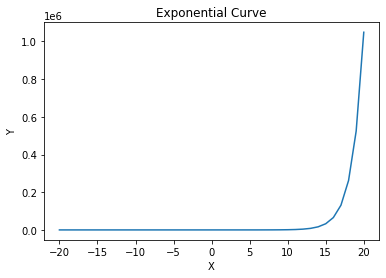
- 회귀분성의 기본가정 中 **잔차의 정규성** 가정이 깨졌을 때, 즉 종속변수가 정규분포되어 있다는 가정을 할 수 없는 경우
- 종속변수가 연속형 변수가 아닌 경우
    - (ex) 종속변수가 범주형 변수 (0 또는 1 / 합격 불합격 / 사망 생존 / poor good excellent)
    - (ex) 종속변수가 개수 count 나타냄 (한 주간 교통사고 발생 건수) 
    

종합하자면,\
__일반화 선형회귀 모형__: 기존의 선형 회귀 모형에서 종속변수의 분포를 정규분포 포함한 여러 분포로 확장하고, 기존 종속변수 평균과 독립변수의 선형 관계를 종속변수 평균의 함수와 독립변수의 선형 관계로 확장한 모형 -> Linear Regression, Logistic Regression, Poisson Regression ... 

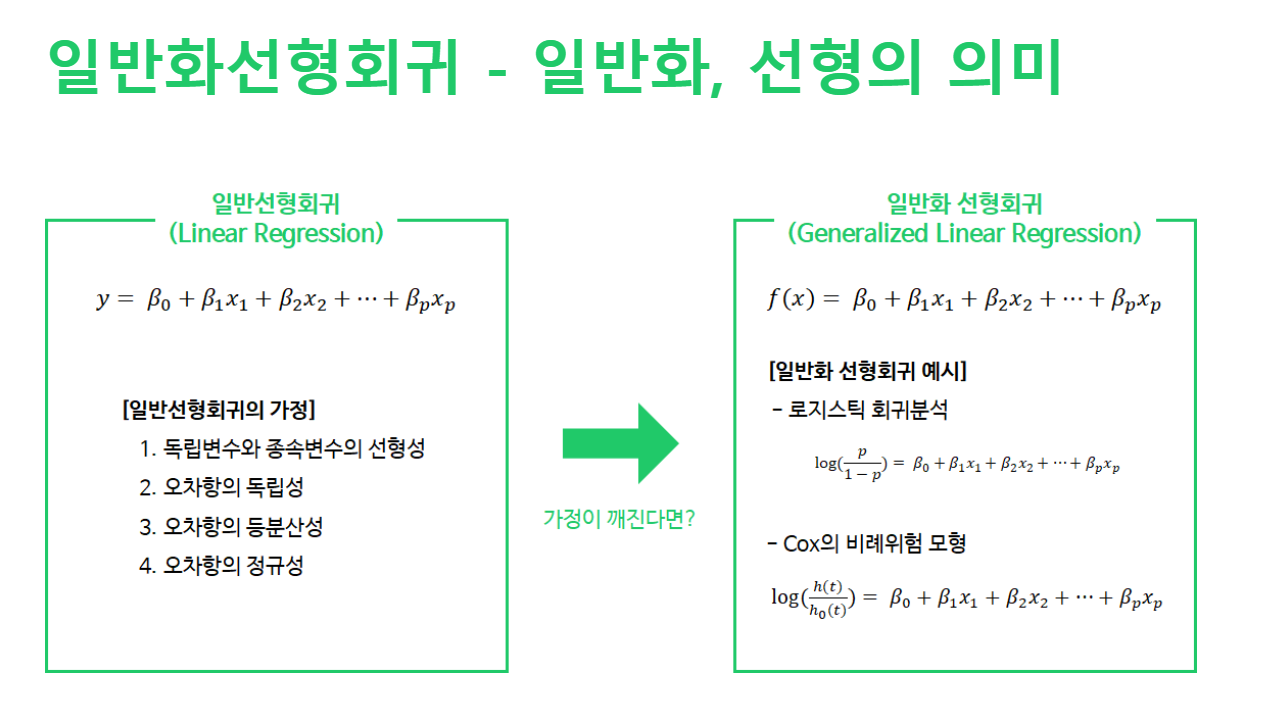

## GLM 구성

###  Random component/Probability Distribution 랜덤성분 
: **반응변수(Y)의 확률분포**
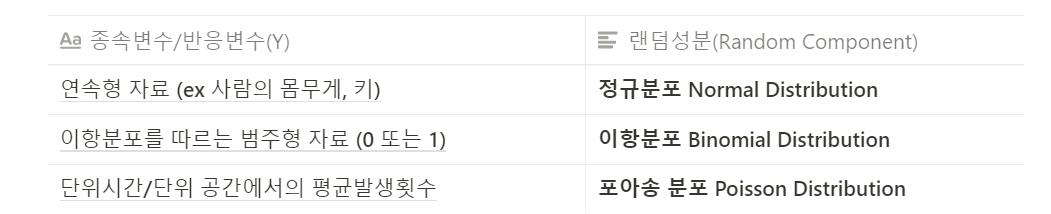 


### Systemetic Component 체계적 성분
: **회귀계수와 설명변수(X)의 선형 결합**
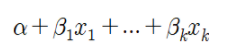 

### Link Function 연결함수
: **연결함수 g(.)는 랜덤성분의 기댓값과 체계적 성분를 연결해주는 함수**
- 반응변수의 값(Y)와 설명변수(X) 간의 관계를 선형형태의 예측식을 통해 정의
- 반응변수 Y의 기댓값은 확률분포의 평균으로  μ=E(Y)로 표시

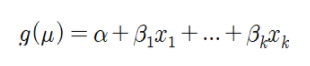


(1) 반응변수가 정규분포일 때,
연결함수: __항등연결함수__ g(μ)=μ
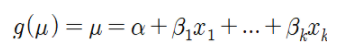

(2) 반응변수가 이항분포일 때,<br>
연결함수: __로짓 연결함수(logit link function)__ g(μ)=log[μ/(1-μ)]
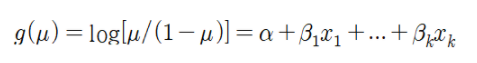

(3) 반응변수가 포아송분포일 때, <br>
연결함수: __로그 연결함수(log link function)__  g(μ)=log(μ)
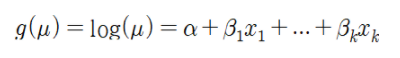

## 대표 예시- 로지스틱 회귀분석

종속변수가 이항분포를 따르는 **범주형(Categorical) 변수**일 경우 사용하는 **분류기법** \
ex) 공부시간(**0~∞**시간)과 시험합격여부(**탈락 / 합격**)


일반선형회귀와 로지스틱 회귀의 차이
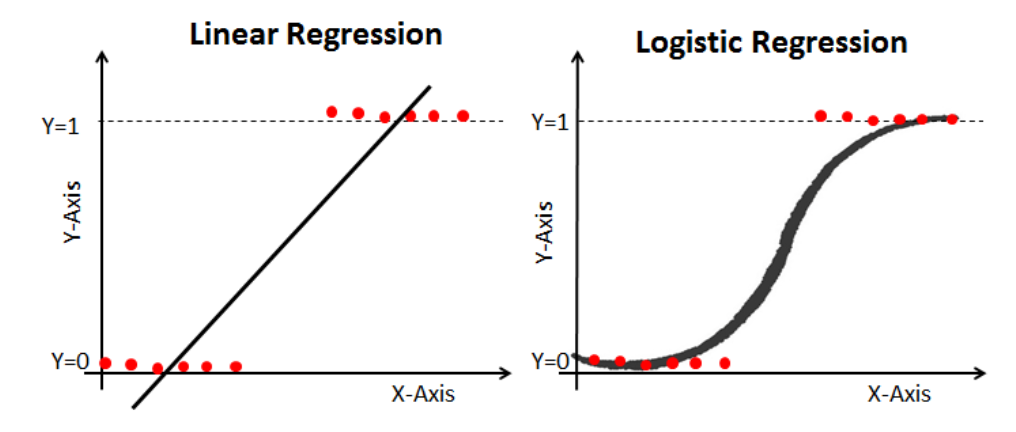
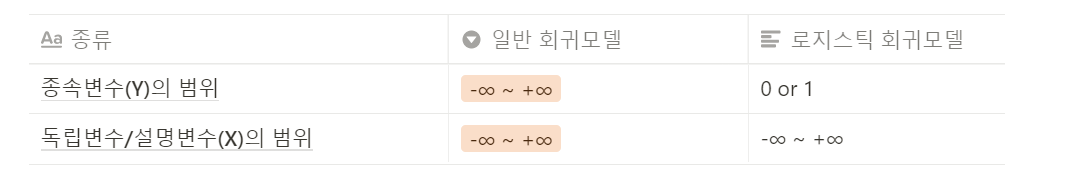

→ 서로 다른 범위를 가진 두 변수(종속/독립)을 하나의 함수로 연결지어야 함

### 종속변수의 범위 바꾸기

1. 이항(성공 / 실패) → 확률(0 ~ 1) : 로지스틱 함수[Logistic(Sigmoid) Function], Odds(승산)<br>
    - $odds=\frac { P(A) }{ P({ A }^{ c }) } =\frac { P(A) }{ 1-P(A) }$<br><br>
    __로지스틱 회귀분석에서 오즈의 개념이 사용되는 이유 => 0에서 1까지의 값만을 갖는 확률을 실수 전체의 값을 갖는 일반적인 회귀모형에 적용할 수 없으므로, 0에서 무한대의 범위를 갖는 오즈를 사용__<br><br>
    - ${ P(A) } → 0  :  odds → 0$
    - ${P(A)} → 1 : odds → ∞$
    - 종속변수  $odds$의 범위가 $0 \sim ∞$로 바뀌게 된다.
    - 하지만, 독립변수와 달리, 아직 음수에서 정의되지 않는다.
    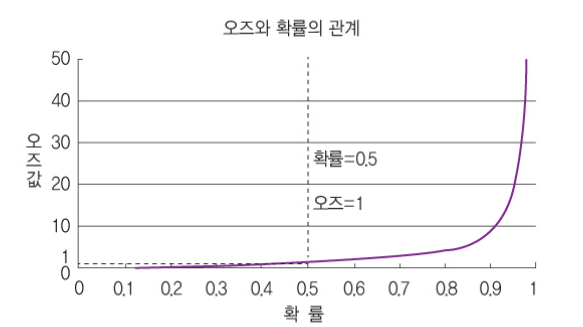

2. **'음의 무한대부터 양의 무한대까지'로 범위 확장하기**
    - $log{(odds)}$
    - $log$를 취하게 되면, 종속변수의 범위가 음의 무한대 부터 양의 무한대로 확장된다.
    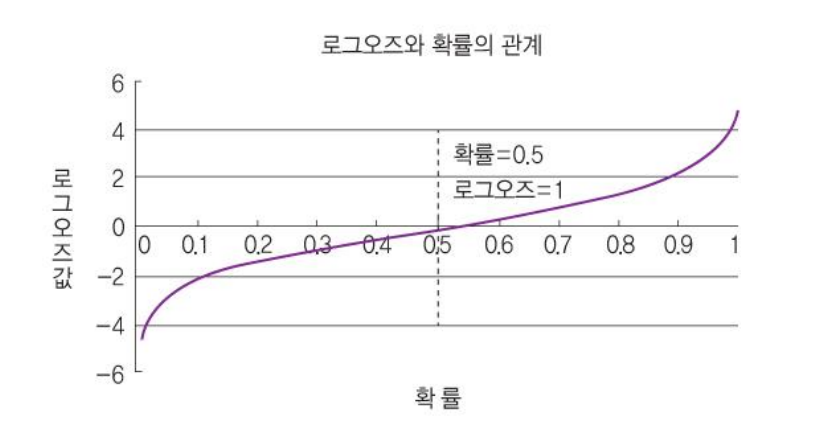

따라서 최종 **로지스틱 회귀모형의 식**, 즉 **로지스틱 회귀방정식**은
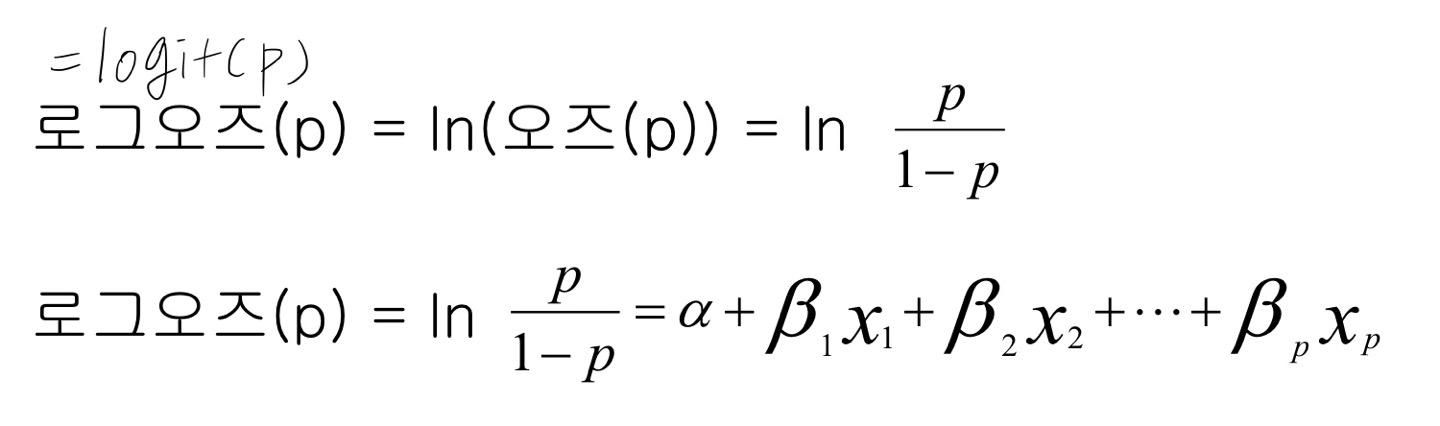

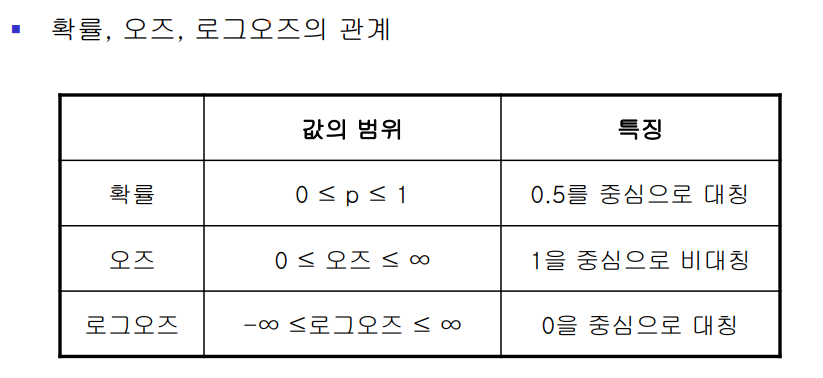

((참고))  <br>
로지스틱 회귀의 Link Function이 Logit 함수이고, 그 역함수인 Activation Function이 바로 'Logistic / Sigmoid'함수
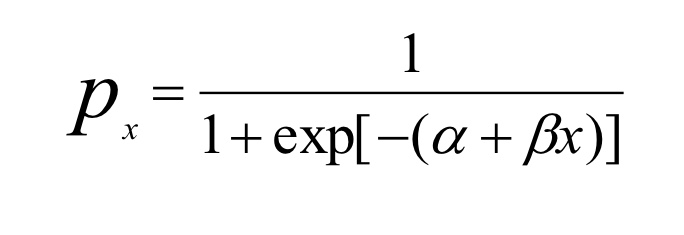
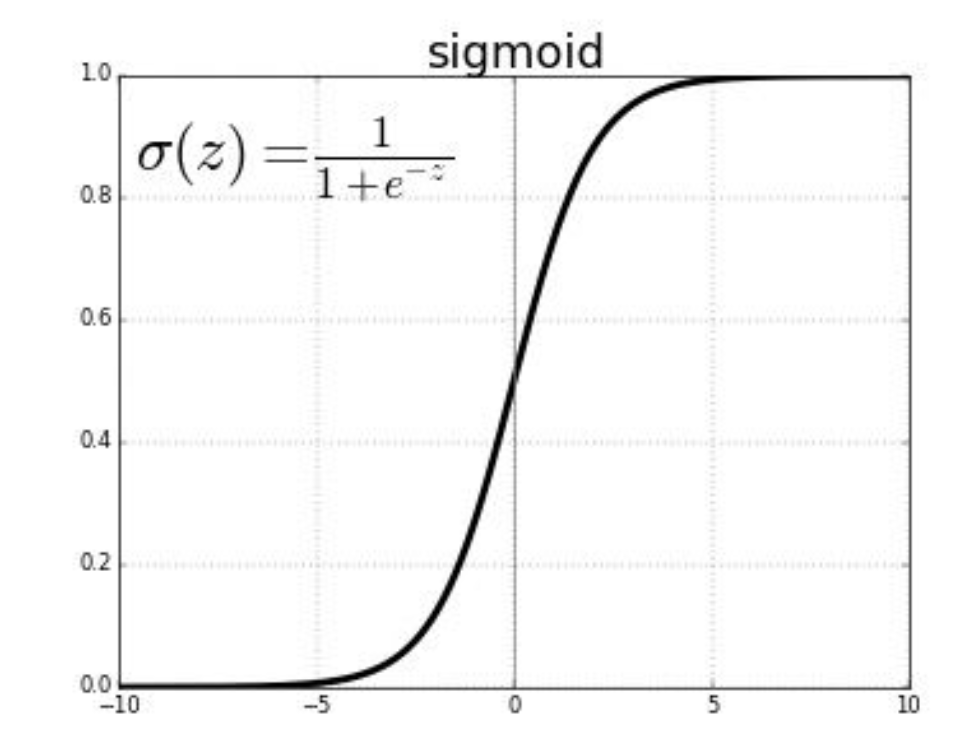


참고 : https://velog.io/@vvakki_/%EC%9D%BC%EB%B0%98%ED%99%94-%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80-%EC%84%A0%ED%98%95-%EC%9D%BC%EB%B0%98%ED%99%94%EC%9D%98-%EC%9D%98%EB%AF%B8

### 로지스틱 회귀 코드

sklearn의 유방암 데이터를 활용하여 진행
- 총 30개의 속성과 malignant(악성), benign(양성) 의 두가지 타겟값을 가지고 있다.

In [18]:
import pandas as pd
import matplotlib.pyplot as p1t
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [20]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
y = pd.DataFrame(cancer.target, columns=['cancer'])
y

,cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3, random_state=0)
y_train = y_train.values.ravel() #Numpy 다차원 배열을 1차원으로 바꿈, 경고 무시용

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀 모델 객체 생성
lr_clf = LogisticRegression()

# 학습 데이터를 이용해서 모델을 학습
lr_clf.fit(X_train, y_train)

# 분리해놨던 테스트 데이터로 각 데이터 분류를 예측
lr_preds = lr_clf.predict (X_test)

lr_preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [24]:
print( 'accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print( 'roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


### 다중 분류

분류가 3개 이상일 때 적용 (ex. 메일 분류- 직장/친구/가족)
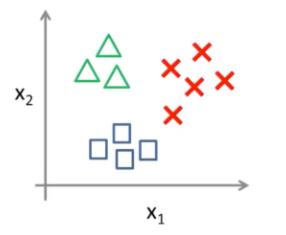

fish data를 활용하여 다중 분류를 진행

In [25]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [26]:
#어떤 종류의 생선이 있는지 출력
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [27]:
#입력 데이터로 쓸 열 선택, 새로운 데이터 프레임으로 반환
#to_numpy() 메서드로 numpy 배열로 바꿔 저장
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [28]:
fish_data =  fish[['Weight','Length','Diagonal','Height','Width']]
fish_data

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [29]:
#target data 생성
fish_target = fish['Species']
fish_target

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [30]:
#train set, test set 분리
train_X, test_X, train_y, test_y = train_test_split(fish_data, fish_target, random_state=42)

In [31]:
ss=StandardScaler()
ss.fit(train_X)
train_scaled=ss.transform(train_X)
test_scaled=ss.transform(test_X)

In [32]:
#로지스틱 회귀 모델 객체 생성
lr = LogisticRegression(C=20, max_iter=1000)  
# 학습 데이터를 이용해서 모델을 학습 시킨다
lr.fit(train_scaled, train_y)

LogisticRegression(C=20, max_iter=1000)

In [33]:
# 로지스틱 회귀 모델의 성능 확인 (정확성 %를 리턴함)
print(lr.score(train_scaled, train_y))
print(lr.score(test_scaled, test_y))

0.9327731092436975
0.925


In [34]:
#처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


참고
- https://woochan-autobiography.tistory.com/416
- https://rstudio-pubs-static.s3.amazonaws.com/41074_62aa52bdc9ff48a2ba3fb0f468e19118.html
- https://eva-codingnote.tistory.com/66
- https://sdsf1225.tistory.com/7
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=chanbal0907&logNo=221389917796

#### 소프트맥스 추가 (딥러닝~신경망과 관련)

시그모이드 함수는 로지스틱 함수의 한 케이스임 <br>
input이 하나일 때 사용되는 **시그모이드 함수**를 <br>
input이 여러 개일때도 사용할 수 있도록 일반화 한 것이 **소프트맥스 함수**
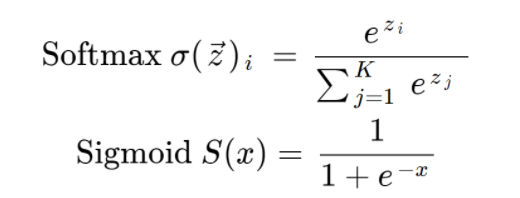

In [35]:
import numpy as np
# 위의 경우에서 샘플에 대한 예측 -> 확률까지 출력해보자.
proba = lr.predict_proba(test_X[:5])
print(np.round(proba, decimals=3))

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [42]:
#각 열이 어떤 생선인가?
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [43]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 이 데이터는 5개의 특성(무게, 길이, 대각선 등)을 사용하니까 coef_ 배열의 열은 5개
- coef와 intercept 모두 행이 7임.

In [44]:
print(lr.coef_)

[[-1.49003244 -1.02924788  2.5935615   7.70351177 -1.20066255]
 [ 0.19620448 -2.01053281 -3.77987354  6.50489293 -1.99489223]
 [ 3.56276993  6.34364898 -8.48975207 -5.75755413  3.7931046 ]
 [-0.10459665  3.60314089  3.93066951 -3.61727141 -1.75071748]
 [-1.40056817 -6.07506801  5.25965968 -0.8722496   1.86044116]
 [-1.38530748  1.49219499  1.3922997  -5.67731722 -4.4009505 ]
 [ 0.62153034 -2.32413617 -0.90656478  1.71598766  3.693677  ]]


In [45]:
print(lr.intercept_)

[-0.09204773 -0.26290711  3.25100463 -0.14740373  2.65493737 -6.78779519
  1.38421175]


예를 들어 생선 "Bream" 의 선형방정식은<br>
**-1.490 x (Weight) -1.029 x (Length) + 2.594 x (DIagnoal) + 7.704 x (Height) - 1.201 x (Width) -0.092**

=> 즉, 다중 분류는 클래스마다 선형 방정식을 계산하는 것임. <br>
=> 7개의 중 가장 높은 z값을 출력하는 클래스가 예측 클래스가 됨

In [46]:
#decision_function() 메서드로 7개의 선형방정식을 구하고
decision = lr.decision_function(test_scaled[:5])

#위의 선형방정식 7개를 확률로 바꿔보자!
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [47]:
#소프트맥스
from scipy.special import softmax

#바로 앞에 구한 decision 배열(z값)을 소프트맥스 함수에 전달
#axis 매개변수로 계산할 축 지정 -> 지정하지 않으면 전체에 대한 소프트맥스를 계산함
#axis=1로 지정해 각 행(각 샘플)에 대해 계산을 수행 
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


→ 앞에서 logistic regression 으로 바로 확률 구한 결과와 같은 걸 확인할 수 있다!

참고
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=chanbal0907&logNo=221389917796